In [87]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [ ]:
place = "University of Canterbury"
network = ox.graph_from_place(place)

In [89]:
nodes, edges = ox.graph_to_gdfs(network)

In [94]:
ernest_rutherford = gpd.GeoDataFrame(
  {'Address': ['Ernest Rutheford']},
  geometry=[Point(172.5824, -43.5225)],
  crs='EPSG:4326'
)

print(ernest_rutherford)

            Address                   geometry
0  Ernest Rutheford  POINT (172.5824 -43.5225)


<Axes: >

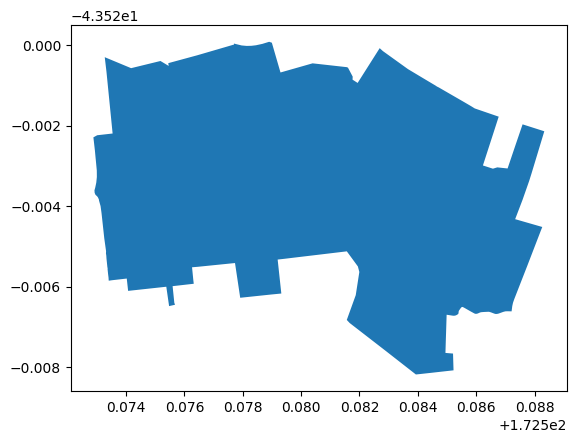

In [96]:
uni_area = ox.geocode_to_gdf(place)

uni_area.plot()

In [97]:
amenities = ['cafe', 'fast_food', 'food_court', 'restaurants']

eatery = ox.features_from_place(place, tags={'amenity': amenities})

In [111]:
eatery

geometry amenity diet:vegan  \
element id                                                            
node    4149989089   POINT (172.58322 -43.52381)    cafe        yes   
        5793355993    POINT (172.5832 -43.52237)    cafe        NaN   
        6515711811   POINT (172.58364 -43.52145)    cafe        yes   
        6853547716   POINT (172.58435 -43.52334)    cafe        NaN   
        9414933106    POINT (172.5826 -43.52353)    cafe        NaN   
        10964806120    POINT (172.5846 -43.5251)    cafe        NaN   

                    diet:vegetarian indoor_seating level          name  \
element id                                                               
node    4149989089              yes            yes     0     Cafe 1894   
        5793355993              NaN            yes     0     Ancestral   
        6515711811              yes            yes   NaN  Nuts & Bolts   
        6853547716              NaN            NaN     0  Therapy Cafe   
        9414933106              NaN            yes     0          Otto   
        10964806120             NaN            yes   NaN      Mix Cafe   

                         opening_hours outdoor_seating smoking  \
element id                                                       
node    4149989089   Mo-Fr 08:00-16:00             yes      no   
        5793355993   Mo-Fr 09:00-16:00             yes     NaN   
        6515711811   Mo-Fr 09:00-14:30              no      no   
        6853547716                 NaN             NaN      no   
        9414933106   Mo-Fr 09:00-19:00             yes      no   
        10964806120                NaN             yes     NaN   

                                                  website wheelchair  \
element id                                                             
node    4149989089   https://ucsa.org.nz/food/ucsa-cafes/        yes   
        5793355993                                    NaN        yes   
        6515711811   https://ucsa.org.nz/food/ucsa-cafes/        yes   
        6853547716                                    NaN        NaN   
        9414933106                                    NaN        NaN   
        10964806120                                   NaN        NaN   

                    payment:credit_cards payment:debit_cards level:ref  \
element id                                                               
node    4149989089                   NaN                 NaN       NaN   
        5793355993                   yes                 yes       NaN   
        6515711811                   yes                 yes       NaN   
        6853547716                   yes                 yes         1   
        9414933106                   yes                 yes       NaN   
        10964806120                  yes                 yes       NaN   

                               cuisine  
element id                              
node    4149989089                 NaN  
        5793355993                 NaN  
        6515711811                 NaN  
        6853547716                 NaN  
        9414933106   pizza;coffee_shop  
        10964806120                NaN

In [99]:
len(eatery)

6

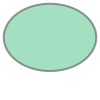

In [100]:
radius_500 = ernest_rutherford.to_crs(epsg=2193).buffer(500).to_crs(epsg=4326)

radius_500.iloc[0]

In [101]:
eatery_polygon = ox.features_from_polygon(radius_500.iloc[0], tags={'amenity': amenities})

In [102]:
eatery_polygon

geometry     addr:city addr:country  \
element id                                                                    
node    3370913297   POINT (172.57918 -43.51953)  Christchurch           NZ   
        4149989089   POINT (172.58322 -43.52381)           NaN          NaN   
        5793355993    POINT (172.5832 -43.52237)           NaN          NaN   
        6515711811   POINT (172.58364 -43.52145)           NaN          NaN   
        6853547716   POINT (172.58435 -43.52334)           NaN          NaN   
        9414933106    POINT (172.5826 -43.52353)           NaN          NaN   
        10964806120    POINT (172.5846 -43.5251)           NaN          NaN   

                    addr:housename addr:housenumber addr:postcode addr:street  \
element id                                                                      
node    3370913297       LB and Co              136          8041   Ilam Road   
        4149989089             NaN              NaN           NaN         NaN   
        5793355993             NaN              NaN           NaN         NaN   
        6515711811             NaN              NaN           NaN         NaN   
        6853547716             NaN              NaN           NaN         NaN   
        9414933106             NaN              NaN           NaN         NaN   
        10964806120            NaN              NaN           NaN         NaN   

                    amenity            cuisine indoor_seating  ...  \
element id                                                     ...   
node    3370913297     cafe        coffee_shop            yes  ...   
        4149989089     cafe                NaN            yes  ...   
        5793355993     cafe                NaN            yes  ...   
        6515711811     cafe                NaN            yes  ...   
        6853547716     cafe                NaN            NaN  ...   
        9414933106     cafe  pizza;coffee_shop            yes  ...   
        10964806120    cafe                NaN            yes  ...   

                    payment:credit_cards payment:debit_cards           phone  \
element id                                                                     
node    3370913297                   yes                 yes  +64 3 974 1460   
        4149989089                   NaN                 NaN             NaN   
        5793355993                   yes                 yes             NaN   
        6515711811                   yes                 yes             NaN   
        6853547716                   yes                 yes             NaN   
        9414933106                   yes                 yes             NaN   
        10964806120                  yes                 yes             NaN   

                                                  website diet:vegan  \
element id                                                             
node    3370913297             https://www.lbandco.co.nz/        NaN   
        4149989089   https://ucsa.org.nz/food/ucsa-cafes/        yes   
        5793355993                                    NaN        NaN   
        6515711811   https://ucsa.org.nz/food/ucsa-cafes/        yes   
        6853547716                                    NaN        NaN   
        9414933106                                    NaN        NaN   
        10964806120                                   NaN        NaN   

                    diet:vegetarian level smoking wheelchair level:ref  
element id                                                              
node    3370913297              NaN   NaN     NaN        NaN       NaN  
        4149989089              yes     0      no        yes       NaN  
        5793355993              NaN     0     NaN        yes       NaN  
        6515711811              yes   NaN      no        yes       NaN  
        6853547716              NaN     0      no        NaN         1  
        9414933106              NaN     0      no        NaN       NaN  
        10964

In [103]:
buildings = ox.features_from_place(place, tags={'building': True})

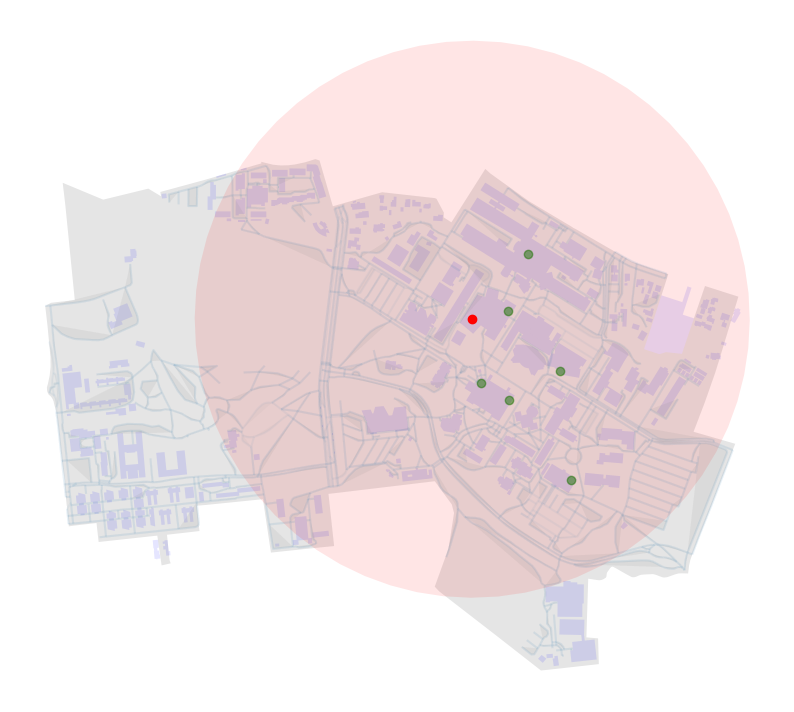

In [110]:
fig, eixo = plt.subplots(figsize=(10, 10))

uni_area.plot(ax = eixo, facecolor='black', alpha=0.1)

edges.plot(ax = eixo, facecolor='gray', alpha=0.05)

buildings.plot(ax = eixo, facecolor='blue', alpha=0.1)

ernest_rutherford.plot(ax=eixo, facecolor='red')

eatery.plot(ax=eixo, facecolor='green', alpha=0.5)

radius_500.plot(ax=eixo, facecolor='red', alpha=0.1)

eixo.set_axis_off()

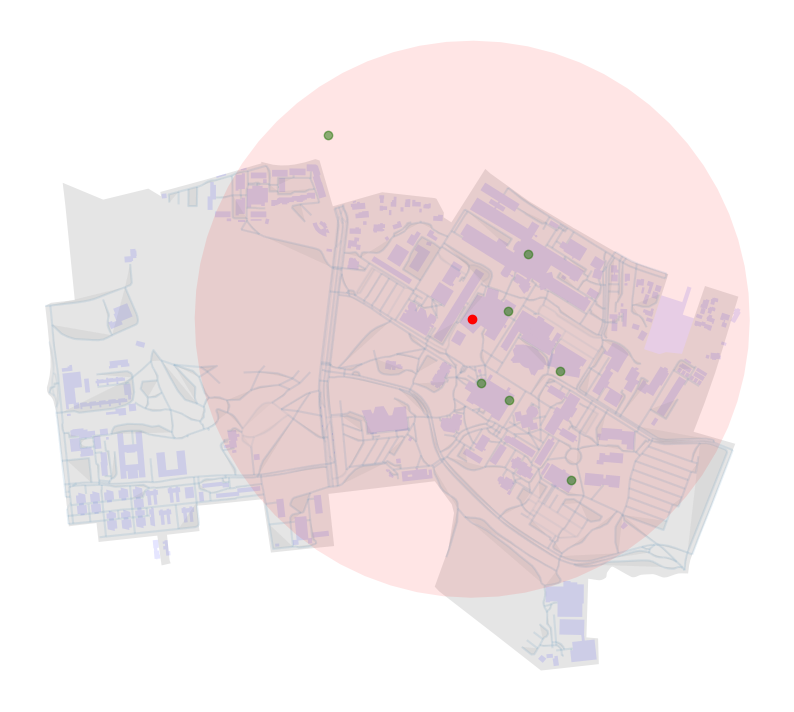

In [112]:
fig, eixo = plt.subplots(figsize=(10, 10))

uni_area.plot(ax = eixo, facecolor='black', alpha=0.1)

edges.plot(ax = eixo, facecolor='gray', alpha=0.05)

buildings.plot(ax = eixo, facecolor='blue', alpha=0.1)

ernest_rutherford.plot(ax=eixo, facecolor='red')

eatery_polygon.plot(ax=eixo, facecolor='green', alpha=0.5)

radius_500.plot(ax=eixo, facecolor='red', alpha=0.1)

eixo.set_axis_off()